# Assignment 9
## Data Visualization II
1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for
distribution of age with respect to each gender along with the information about whether
they survived or not. (Column names : 'sex' and 'age')
2. Write observations on the inference from the above statistics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid",font_scale = 1)

In [2]:
tdata=sns.load_dataset('titanic')
tdata.shape

(891, 15)

In [3]:
tdata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
tdata.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
tdata.shape

(891, 15)

In [13]:
data=tdata[~ tdata['age'].isnull()]

In [15]:
data.shape

(714, 15)

### 1. Plot a box plot for distribution of age with respect to each gender along with the information about whether they survived or not. (Column names : 'sex' and 'age')

Survival Rate

survived          0          1         All
sex                                       
female     8.963585  27.591036   36.554622
male      50.420168  13.025210   63.445378
All       59.383754  40.616246  100.000000


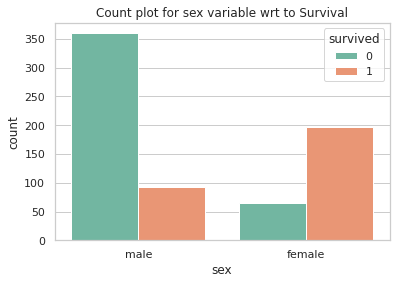

In [6]:
survival_rate=pd.crosstab(data['sex'],data['survived'],margins=True,normalize=True)
print('Survival Rate\n')
print(survival_rate.applymap(lambda x: x*100))
sns.countplot(data=data,x='sex',hue='survived',palette="Set2")
plt.title('Count plot for '+'sex'+' variable wrt to Survival')
plt.show()

In [7]:
data.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


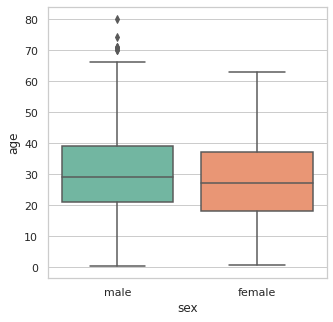

In [8]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data,y='age',x='sex',palette='Set2')
plt.show()

In [9]:
male_data=data[data['sex']=='male']
female_data=data[data['sex']=='female']

male_info=male_data.groupby('survived')['age'].describe()
female_info=female_data.groupby('survived')['age'].describe()

print('______________________________________________________________________\n')
print('Description of Age Attribute of Male passesngers wrt Survival')
print('______________________________________________________________________\n')
print(male_info)
print('______________________________________________________________________\n')
print('Description of Age Attribute of Female passesngers wrt Survival')
print('______________________________________________________________________\n')
print(female_info)

print('______________________________________________________________________\n')

______________________________________________________________________

Description of Age Attribute of Male passesngers wrt Survival
______________________________________________________________________

          count       mean        std   min    25%   50%    75%   max
survived                                                             
0         360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
1          93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0
______________________________________________________________________

Description of Age Attribute of Female passesngers wrt Survival
______________________________________________________________________

          count       mean        std   min    25%   50%    75%   max
survived                                                             
0          64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
1         197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
__________________________

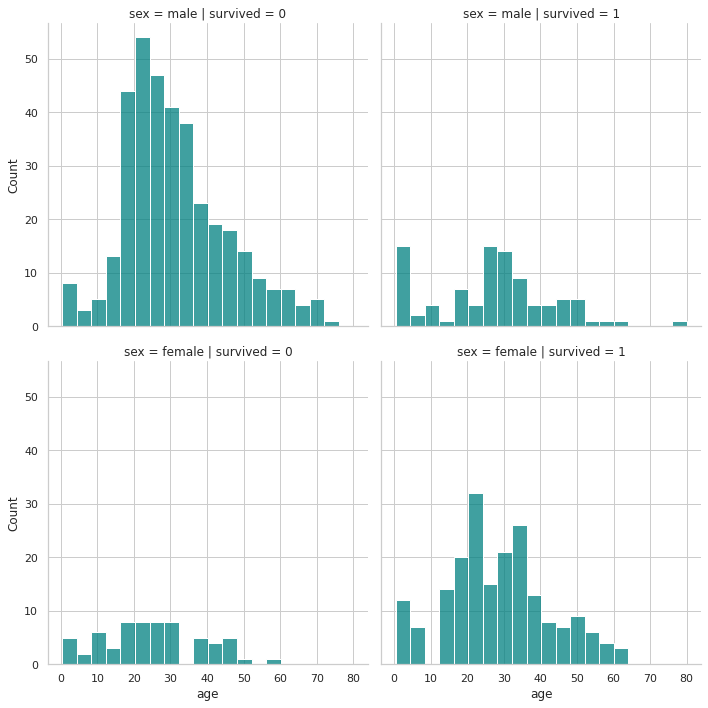

In [10]:
sns.displot(data=data,x='age',row='sex',col='survived',color='teal')
plt.show()

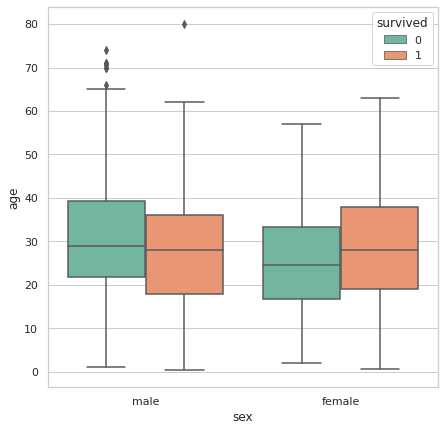

In [11]:
plt.figure(figsize=(7,7))
sns.boxplot(data=data,y='age',x='sex',hue='survived',palette='Set2')
plt.show()

### 2. Observations on the inference from the above statistics.

1. No of Male Passengers > No of Female passengers

2. Survival Rate in Female passengers is more than the Survival Rate in Male passengers
             26.15 > 12.23

3. Description of Age Attribute of Male passesngers wrt Survival
    - Average Age of survived male passengers > Average Age of male passengers not survived
        
             31.62 > 27.28
    - There exists outliers in male passegers who have age higher than normal distribution
    - The 25%,50% and 75% of Age of survived male passengers is slightly less than 
      the 25%,50% and 75% of Age of male passengers who did not survive

4. Description of Age Attribute of Female passesngers wrt Survival
    - Average Age of survived male passengers > Average Age of male passengers not survived
        
             25.04 > 28.84
    - No outliers in female passegers wrt to their ages
    - The 25%,50% and 75% of Age of survived male passengers is more than 
      the 25%,50% and 75% of Age of male passengers who did not survive

5. Average Age of survived male passengers < Average Age of survived female passengers

        